In [ ]:
import pandas as pd


df1=pd.read_csv("/content/drive/MyDrive/DS1/i1.csv")
df1.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-09-19,2023-09-19 22:03:44,28389,Kulcha,55.0,1.0,55.0,0.0,2.76,57.76,16,biller,0,NaN,Indian Breads,NaN
1,2023-09-19,2023-09-19 22:03:44,28389,Parota,30.0,4.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Indian Breads,NaN
2,2023-09-19,2023-09-19 22:03:44,28389,Mushroom Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
3,2023-09-19,2023-09-19 22:03:44,28389,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,16,biller,0,NaN,Veg Gravy,NaN
4,2023-09-19,2023-09-19 22:03:44,28389,Gobi- 65,120.0,1.0,120.0,0.0,6.00,126.00,16,biller,0,NaN,Veg Starters,NaN


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/DS1/i2.csv")
df2.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-06-30,2023-06-30 22:47:50,26190,Mineral Water,20.0,1.0,20.0,0.0,1.0,21.0,1.0,biller,0,NaN,Deserts & Mocktails,NaN
1,2023-06-30,2023-06-30 22:25:11,26189,Chapathi (2 No),50.0,1.0,50.0,0.0,2.5,52.5,9.0,biller,0,NaN,Indian Breads,NaN
2,2023-06-30,2023-06-30 22:25:11,26189,Roti,40.0,1.0,40.0,0.0,2.0,42.0,9.0,biller,0,NaN,Indian Breads,NaN
3,2023-06-30,2023-06-30 22:25:11,26189,Mushroom Pulao,140.0,1.0,140.0,0.0,7.0,147.0,9.0,biller,0,NaN,VEG BIRYANI & RICE,NaN
4,2023-06-30,2023-06-30 22:25:11,26189,Veg Fried Rice,130.0,1.0,130.0,0.0,6.5,136.5,9.0,biller,0,NaN,VEG BIRYANI & RICE,NaN


In [ ]:
df=df1.merge(df2,how='outer')
df.head()

,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
0,2023-04-01,2023-04-01 13:16:03,23465,Babycorn Manchurian,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,Veg Starters,NaN
1,2023-04-01,2023-04-01 13:16:03,23465,Chicken Kati Roll,120.0,1.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,NON VEG STARTERS CHICKEN,NaN
2,2023-04-01,2023-04-01 13:16:03,23465,Paneer Butter Masala,150.0,2.0,300.0,0.0,15.0,315.0,20.0,biller,0,NaN,Veg Gravy,NaN
3,2023-04-01,2023-04-01 13:16:03,23465,Pulka (2 No),40.0,3.0,120.0,0.0,6.0,126.0,20.0,biller,0,NaN,Indian Breads,NaN
4,2023-04-01,2023-04-01 13:16:03,23465,Schewan Chicken Fried Rice,160.0,1.0,160.0,0.0,8.0,168.0,20.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN


In [ ]:
df.shape

(15621, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No.  15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Qty.         15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No.    15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Invoice No.,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Covers,HSN
count,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15621.000000,15613.000000,15621.0,0.0
mean,25989.963127,116.608988,1.338839,147.407080,1.262818,7.303668,153.447930,18.068340,0.0,NaN
std,1433.192998,63.663769,0.949814,210.127442,6.656396,10.461474,219.678163,17.191377,0.0,NaN
min,23465.000000,12.000000,1.000000,12.000000,0.000000,0.000000,12.600000,1.000000,0.0,NaN
25%,24751.000000,50.000000,1.000000,80.000000,0.000000,4.000000,84.000000,4.000000,0.0,NaN
50%,25980.000000,140.000000,1.000000,150.000000,0.000000,7.000000,147.000000,12.000000,0.0,NaN
75%,27274.000000,160.000000,1.000000,170.000000,0.000000,8.500000,178.500000,26.000000,0.0,NaN
max,28389.000000,770.000000,28.000000,21560.000000,288.000000,1078.000000,22638.000000,50.000000,0.0,NaN


In [ ]:
df.isnull().sum()

,0
Date,0
Timestamp,0
Invoice No.,0
Item Name,0
Price,0
Qty.,0
Sub Total,0
Discount,0
Tax,0
Final Total,0


In [ ]:
# To see how many unique values
df["Invoice No."].unique()

array([23465, 23466, 23467, ..., 28387, 28388, 28389])

In [ ]:
# TOTAL UNIQUE VALUES
df["Invoice No."].nunique()

4925

In [ ]:
df.groupby("Invoice No.")


In [ ]:
# Group By
inv=df.groupby("Invoice No.")["Final Total"].sum()
inv

,Final Total
Invoice No.,
23465,1134.00
23466,441.00
23467,774.88
23468,273.00
23469,462.00
...,...
28385,493.50
28386,1479.44
28387,1501.50


In [ ]:
#Group By to find final total of 28327

inv=df.groupby("Invoice No.")["Final Total"].sum().loc[28327]
inv

np.float64(1081.5)

In [ ]:
# Overall Revenue
df["Final Total"].sum()

np.float64(2397010.12)

In [ ]:
# Average order value = total revenue/no.of invoice(for each person)
df["Final Total"].sum()/df["Invoice No."].nunique()



np.float64(486.70256243654825)

In [ ]:
#To find the top 3 most favorite items


items=df.groupby("Item Name")["Qty."].sum().nlargest(3)
items

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0


In [ ]:
itemsrev=df.groupby("Item Name")["Qty."].sum().nlargest(5)
itemsrev

,Qty.
Item Name,
Mineral Water,1672.0
Chicken Biriyani With Raitha And Gravy,1453.0
Butter Naan,1046.0
Romali Roti (1 No),822.0
Lemon Soda,722.0


In [ ]:
# top 3 favorite revenue wise
sortitems=df.groupby("Item Name")["Final Total"].sum().sort_values(ascending=False)[0:3]
sortitems

,Final Total
Item Name,
Chicken Biriyani With Raitha And Gravy,240730.96
Chicken Fried Rice,119347.20
Butter Naan,65387.74


In [ ]:
import matplotlib.pyplot as plt

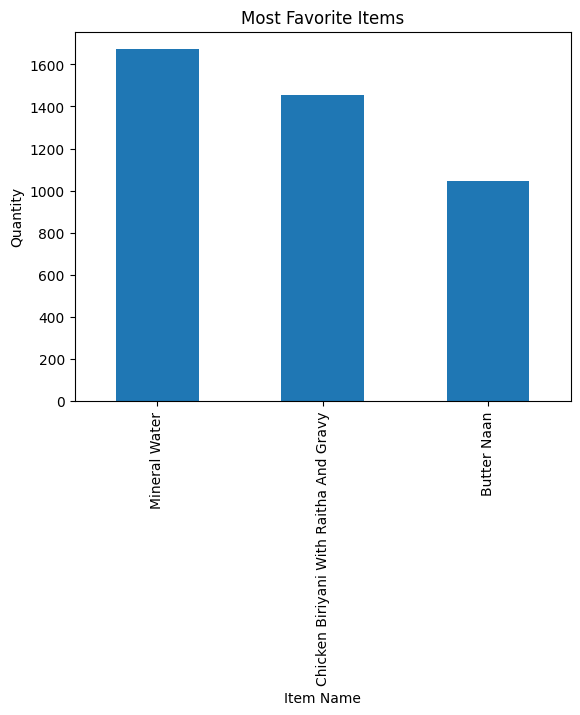

In [ ]:
items.plot(kind='bar')
plt.xlabel("Item Name")
plt.ylabel("Quantity")
plt.title("Most Favorite Items")
plt.show()

In [ ]:
date_filter=df[df['Date']=='2023-09-14']
date_filter


,Date,Timestamp,Invoice No.,Item Name,Price,Qty.,Sub Total,Discount,Tax,Final Total,Table No.,Server Name,Covers,Variation,Category,HSN
14980,2023-09-14,2023-09-14 13:27:37,28192,Masala Omelet (two Eggs,40.0,1.0,40.0,0.0,2.00,42.00,9.0,biller,0,NaN,NON VEG STARTERS EGG,NaN
14981,2023-09-14,2023-09-14 13:27:37,28192,Paneer Butter Masala,150.0,1.0,150.0,0.0,7.50,157.50,9.0,biller,0,NaN,Veg Gravy,NaN
14982,2023-09-14,2023-09-14 13:27:37,28192,Romali Roti (1 No),50.0,2.0,100.0,0.0,5.00,105.00,9.0,biller,0,NaN,Indian Breads,NaN
14983,2023-09-14,2023-09-14 13:31:07,28193,Veg Fried Rice,130.0,1.0,130.0,0.0,6.50,136.50,6.0,biller,0,NaN,VEG BIRYANI & RICE,NaN
14984,2023-09-14,2023-09-14 13:31:52,28194,Mineral Water,20.0,1.0,20.0,0.0,1.00,21.00,50.0,biller,0,NaN,Deserts & Mocktails,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,2023-09-14,2023-09-14 22:15:03,28221,Butter Naan,60.0,1.0,60.0,0.0,3.00,63.00,4.0,biller,0,NaN,Indian Breads,NaN
15066,2023-09-14,2023-09-14 22:15:03,28221,Chappathi (1 No.),25.0,1.0,25.0,0.0,1.26,26.26,4.0,biller,0,NaN,Indian Breads,NaN
15067,2023-09-14,2023-09-14 22:15:03,28221,Chicken Chettinad Gravy,170.0,1.0,170.0,0.0,8.50,178.50,4.0,biller,0,NaN,Non Veg Gravy,NaN
15068,2023-09-14,2023-09-14 22:15:03,28221,Chicken Fried Rice,160.0,1.0,160.0,0.0,8.00,168.00,4.0,biller,0,NaN,NON VEG BRIYANI & RICE,NaN


In [ ]:
#14.9.2023 to find most spend inv
# how to find which invoics number is highest final total on 2023-09-14

dateinv=date_filter.groupby("Invoice No.")["Final Total"].sum().nlargest(1)

dateinv


,Final Total
Invoice No.,
28215,1492.2


In [ ]:
# To identify no.of invoices whose bill value is above the overall avg bill value
bill=df.groupby("Invoice No.")["Final Total"].sum()
total_mean=bill.mean()
print("Overall final total(revenue) mean is :",total_mean)
ans=bill[bill>total_mean]
ans

Overall final total(revenue) mean is : 486.70256243654825


,Final Total
Invoice No.,
23465,1134.00
23467,774.88
23470,687.76
23471,513.44
23476,656.78
...,...
28385,493.50
28386,1479.44
28387,1501.50


In [ ]:
# On each date,which product was the top seller(by Qty)-barhart
# Do high-quantity items always generate high revenue?
# Which product contributes the highest percentage of total revenue?

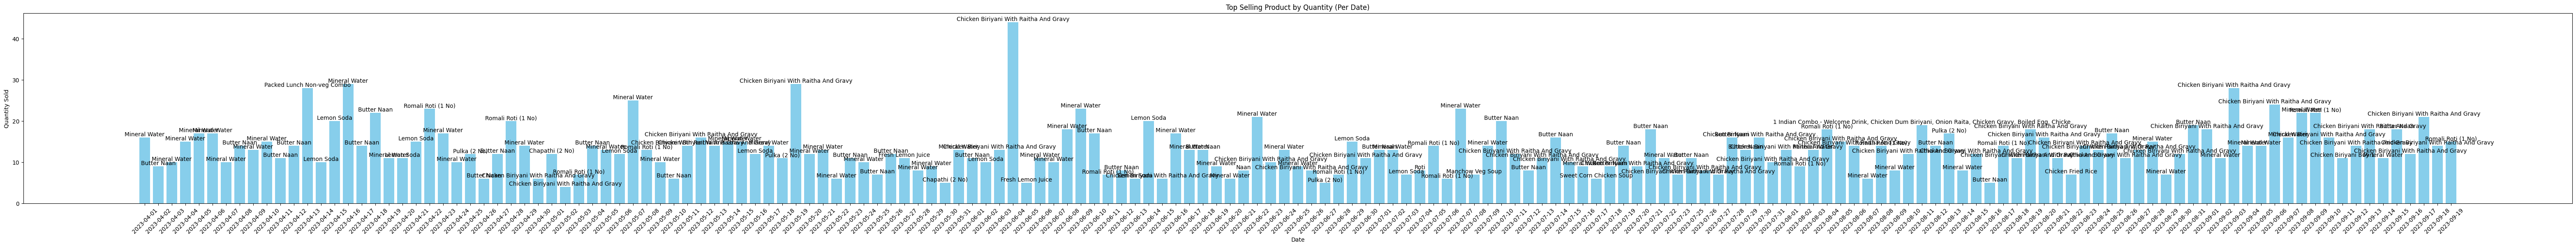

In [ ]:

# 1. Add .reset_index() here to keep it as a DataFrame
daily_products=df.groupby(["Date","Item Name"])["Qty."].sum().reset_index()

# 2. For each Date, pick the row with the highest Quantity
top_daily = daily_products.sort_values(['Date', 'Qty.'], ascending=[True, False])

# 3. Keep only the top item for each date
top_daily = top_daily.drop_duplicates('Date', keep='first')


# 4. Create the Bar Chart
plt.figure(figsize=(80, 6))
plt.bar(top_daily['Date'].astype(str), top_daily['Qty.'], color='skyblue')

# Add product names as labels above the bars
for i, row in top_daily.iterrows():
    plt.text(row['Date'], row['Qty.'], row['Item Name'], ha='center', va='bottom')

plt.title('Top Selling Product by Quantity (Per Date)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

Correlation between Quantity and Revenue: 0.52


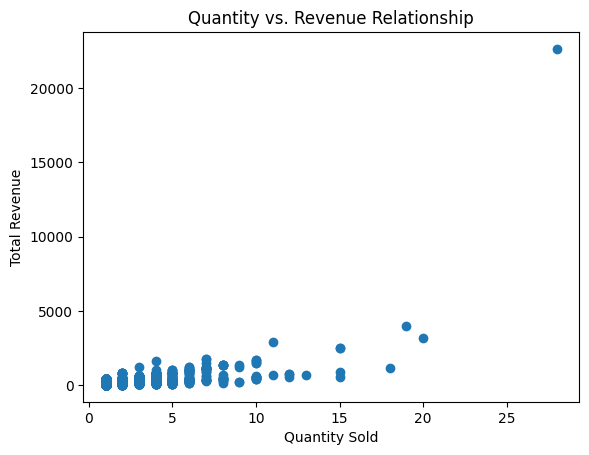

In [ ]:
# Calculate correlation (Closer to 1 means high volume = high revenue)
correlation = df['Qty.'].corr(df['Final Total'])
print(f"Correlation between Quantity and Revenue: {correlation:.2f}")

# Visualize the relationship with a scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['Qty.'], df['Final Total'])
plt.xlabel('Quantity Sold')
plt.ylabel('Total Revenue')
plt.title('Quantity vs. Revenue Relationship')
plt.show()


In [ ]:
# Group by Item and sum their individual revenues
product_revenue = df.groupby("Item Name")["Final Total"].sum().reset_index()

# Calculate the percentage contribution for each product
total_store_revenue = product_revenue["Final Total"].sum()
product_revenue["Revenue %"] = (product_revenue["Final Total"] / total_store_revenue) * 100

# Find the top contributor
top_contributor = product_revenue.sort_values("Revenue %", ascending=False).iloc[0]

print(f"Top Contributor: {top_contributor['Item Name']}")
print(f"Contribution: {top_contributor['Revenue %']:.2f}% of total revenue")


Top Contributor: Chicken Biriyani With Raitha And Gravy
Contribution: 10.04% of total revenue


**CLASSIFICATION (DIABETES DATASET)**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS1/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.iloc[:,:-1]
y=df["Outcome"]
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=100,criterion="entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
y_pred=model.predict(x_test)
x_pred=model.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7272727272727273

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[75, 24],
       [18, 37]])

[Text(0.48342927631578947, 0.9705882352941176, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1852796052631579, 0.9117647058823529, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.3343544407894737, 0.9411764705882353, 'True  '),
 Text(0.06578947368421052, 0.8529411764705882, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.021052631578947368, 0.7941176470588235, 'x[6] <= 0.672\nentropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.010526315789473684, 0.7352941176470589, 'entropy = 0.0\nsamples = 108\nvalue = [108, 0]'),
 Text(0.031578947368421054, 0.7352941176470589, 'x[6] <= 0.686\nentropy = 0.337\nsamples = 16\nvalue = [15, 1]'),
 Text(0.021052631578947368, 0.6764705882352942, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.042105263157894736, 0.6764705882352942, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.11052631578947368, 0.7941176470588235, 'x[2] <= 37.0\nentropy = 0.6

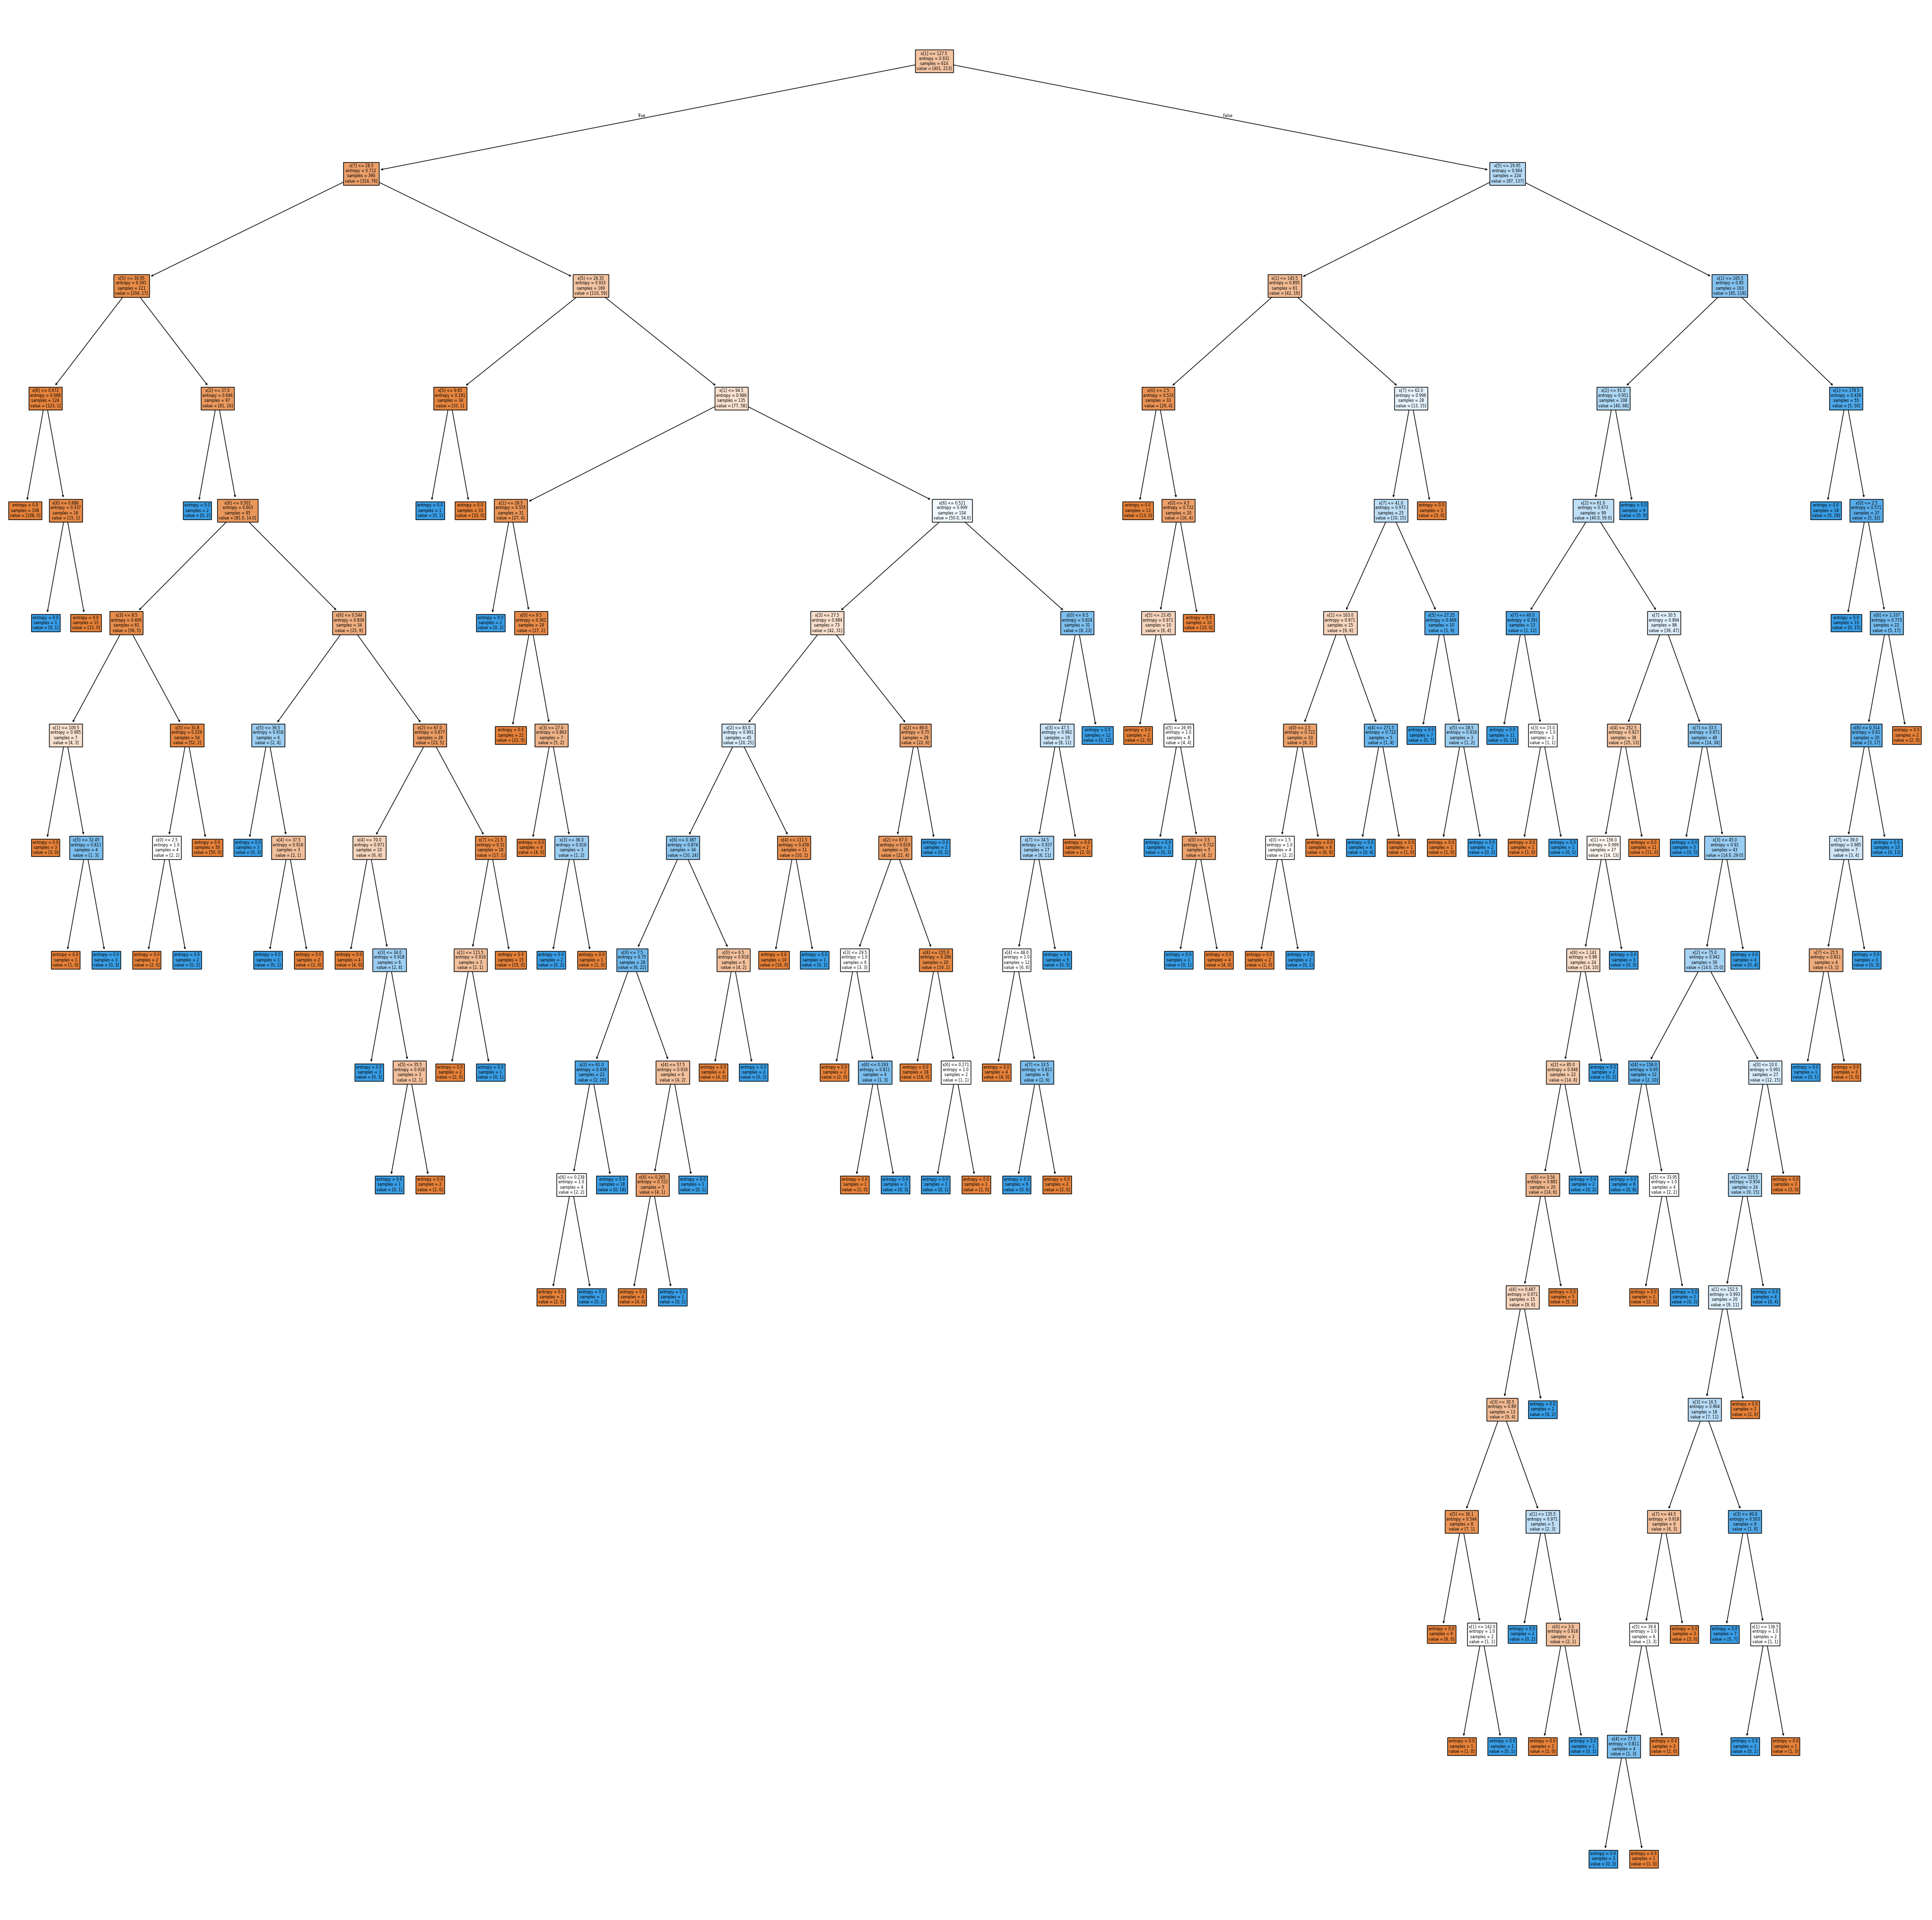

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(50,50))

tree.plot_tree(model,filled=True)

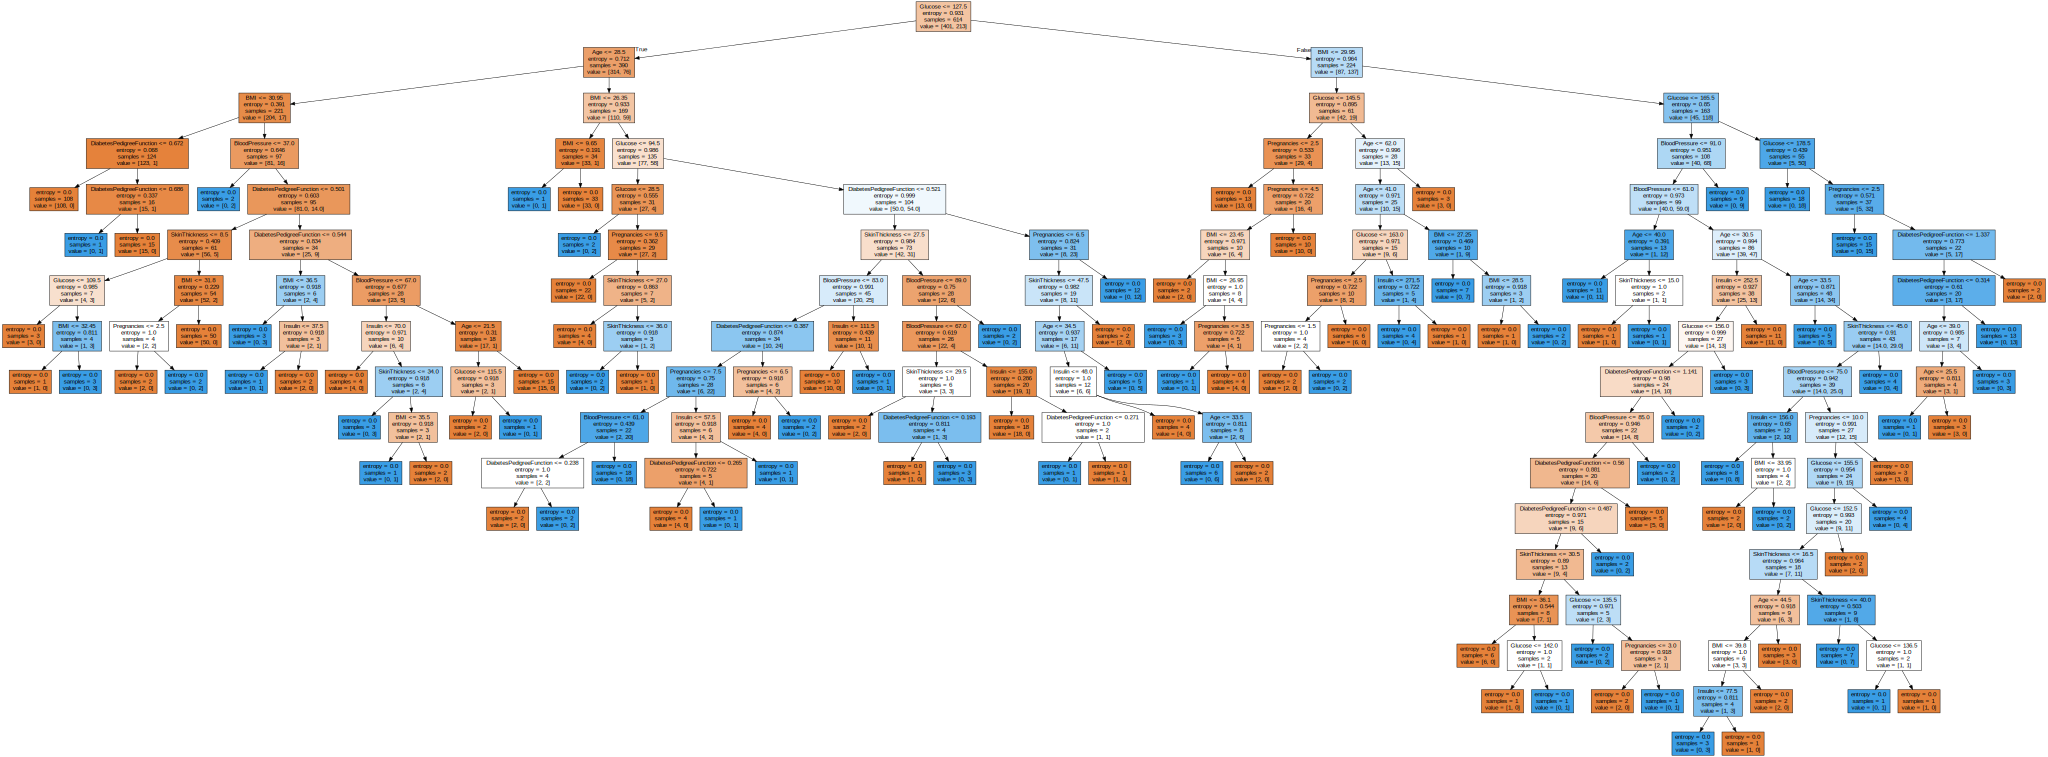

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
graphviz.Source(export_graphviz(model,feature_names=x.columns,filled=True))